# Neurosynth Analysis - Plots

## Import packages and data

In [4]:
#basic
import os
import glob
import pandas as pd
import numpy as np

#plotting (dendrograms)
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerBase

#plotting (histograms)
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines


#get 95%tiles percentile - evidence
#evidence_res_r2 = pd.read_csv('resampling/null_model_evidence_unthresholded_r2.csv')
#evidence_r2 = pd.Series(evidence_res_r2['r2'])
#arr = np.array([.95])
#res_evidence_r2_95_perc_rank = evidence_r2.quantile(arr)

#get 95%tiles percentile - crime-type bias
scenario_res_r2 = pd.read_csv('resampling/null_model_scenario_unthresholded_r2.csv')
#scenario_r2 = pd.Series(scenario_res_r2['r2'])
#arr = np.array([.95])
#res_scenario_r2_95_perc_rank = scenario_r2.quantile(arr)


# res_r2 = pd.read_csv('resampling/resampling_r2_values.csv')
# evidence_r2 = pd.Series(res_r2['evidence_r2'])
# arr = np.array([.95])
# res_evidence_r2_95_perc_rank = evidence_r2.quantile(arr)
# #get 95%tiles percentile - crime-type bias
# scenario_r2 = pd.Series(res_r2['scenario_r2'])
# arr = np.array([.95])
# res_scenario_r2_95_perc_rank = scenario_r2.quantile(arr)


In [5]:
#link model names to r2
model_df = pd.DataFrame(columns=['num_topics', 'model_name'],
                        data=[[16,'ev'],[10,'n'],[7,'ex_ev'],
                              [6,'ut'],[4,'mj'],[4,'ecr_connect'],
                              [4,'r'],[3,'aff'],[3,'ut_p'],[3,'ut_v'],[2,'mj_s'],
                              [2,'mj_mj'],[2,'ecr_cib'],[2,'ecr_r'],[2,'wm']])

model_list = model_df['model_name'].tolist()
#evidence_res_r2_w_model = pd.merge(evidence_res_r2, model_df, on="num_topics")
scenario_res_r2_w_model = pd.merge(scenario_res_r2, model_df, on="num_topics")


In [6]:
#print('evidence')
#print(evidence_res_r2_w_model)
print('scenario')
print(scenario_res_r2_w_model)

scenario
   num_topics        r2            aic            bic model_name
0           2  0.031789  684054.493204  684085.510855       mj_s
1           2  0.031789  684054.493204  684085.510855      mj_mj
2           2  0.031789  684054.493204  684085.510855    ecr_cib
3           2  0.031789  684054.493204  684085.510855      ecr_r
4           2  0.031789  684054.493204  684085.510855         wm
5           3  0.039320  682271.489135  682312.846003        aff
6           3  0.039320  682271.489135  682312.846003       ut_p
7           3  0.039320  682271.489135  682312.846003       ut_v


## Font settings

In [7]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({"ps.useafm": True})
plt.rc('pdf',fonttype=42)

## Dendrograms

       event                                   model        r2
0   evidence                       extra_evidentiary  0.017691
1   evidence                             evidentiary  0.262336
2   evidence                               narrative  0.171093
3   evidence                                 utility  0.138180
4   evidence                                  affect  0.004211
5   evidence                          moral_judgment  0.011578
6   evidence               exp_cult_recall_narrative  0.068558
7   evidence                       reading_narrative  0.051291
8   evidence                            wm_narrative  0.093989
9   evidence                     utility_probability  0.113504
10  evidence                           utility_value  0.034734
11  evidence                  moral_judgement_social  0.006377
12  evidence                      moral_judgement_mj  0.007675
13  evidence  exp_cult_recall_narrative_cult_id_bias  0.018429
14  evidence        exp_cult_recall_narrative_recall  0

<ipython-input-9-136d6e8b8ef7>:788: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('plots/dendrograms/supp_fig_5.pdf',
<ipython-input-9-136d6e8b8ef7>:788: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('plots/dendrograms/supp_fig_5.pdf',


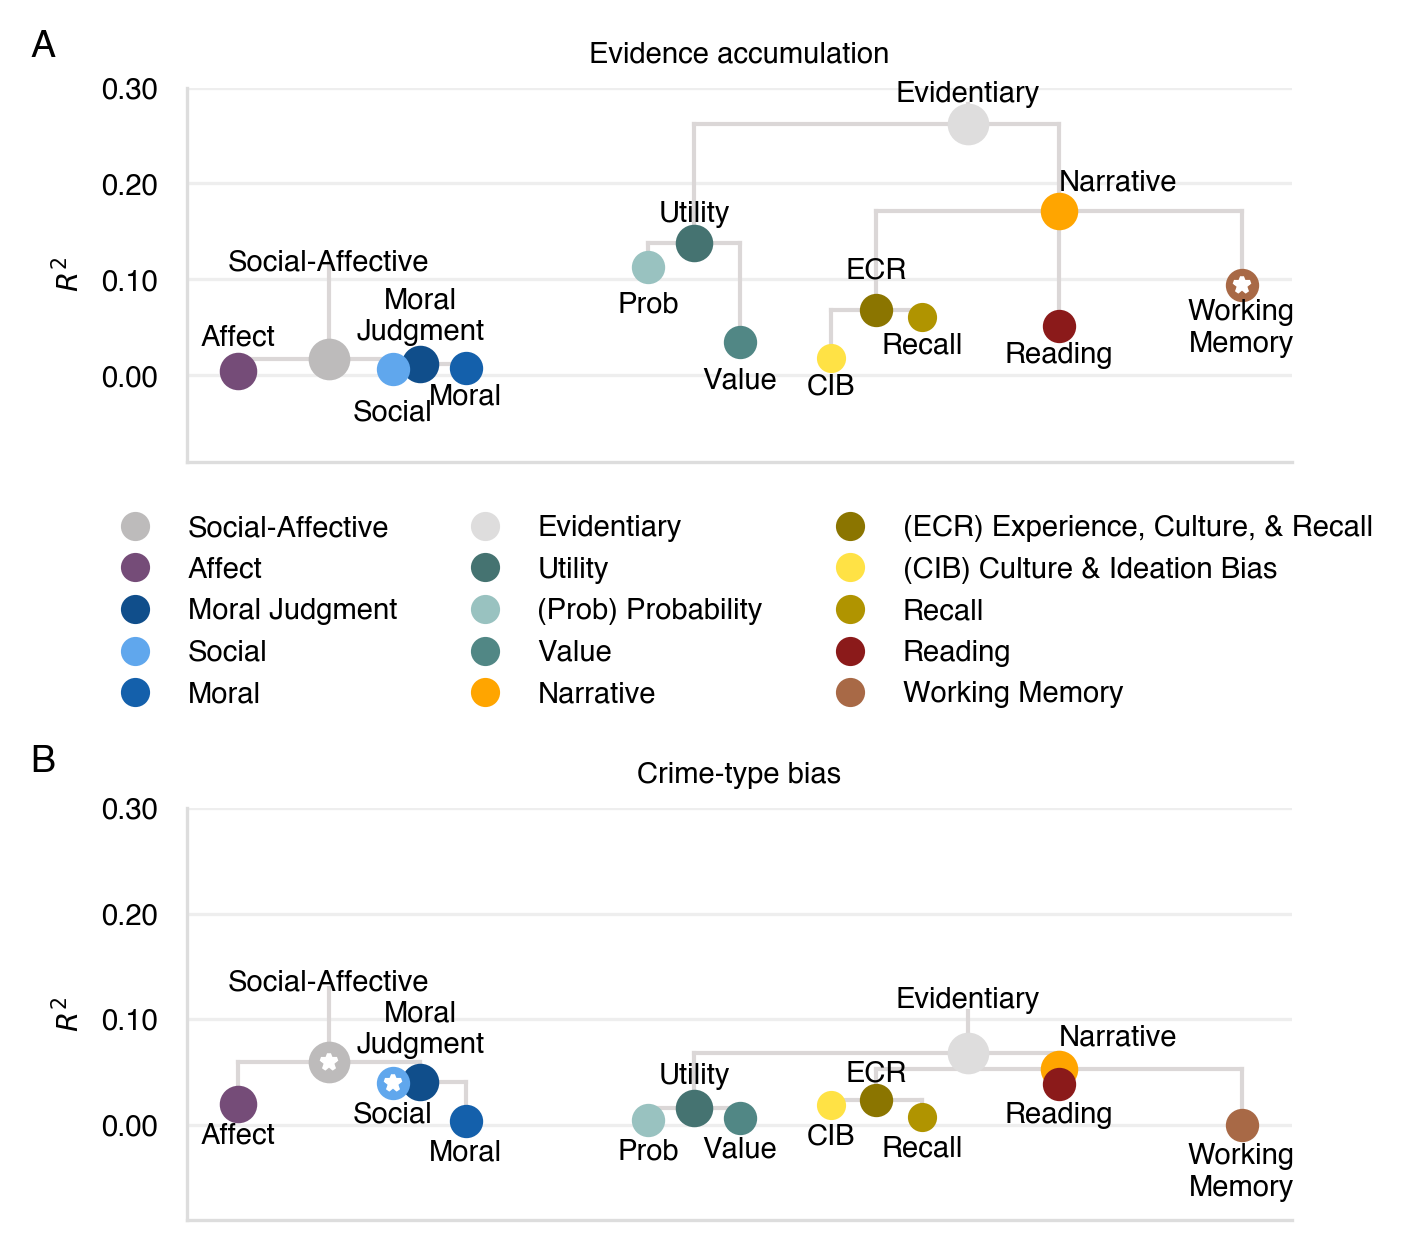

In [9]:
#data for dendrogram plot
model_r_squared = pd.read_csv('decoding_output/model_r2_unthresholded.csv')

#Evidence Only
model_r_squared = model_r_squared[model_r_squared.event == 'evidence']
model_r_squared = model_r_squared.loc[:, ~model_r_squared.columns.str.contains('^Unnamed')]
model_r_squared = model_r_squared.loc[:, ~model_r_squared.columns.str.contains('^index')]
#model_r_squared = model_r_squared.reset_index()
model_r_squared.reset_index(drop=True, inplace=True)
print(model_r_squared)


#plot
# fig, ax = plt.subplots(3,figsize=(4.75, 5), dpi=300)
# fig.patch.set_alpha(1)

# gs = gridspec.GridSpec(ncols=1,nrows=3, height_ratios=[2,1,2], width_ratios=[1])

# ax0 = plt.subplot(gs[0])
# ax1 = plt.subplot(gs[1])
# ax2 = plt.subplot(gs[2])


fig = plt.figure(figsize=(4.75, 5.0),dpi=300)
fig.patch.set_alpha(1)

gs0 = gridspec.GridSpec(2, 1, height_ratios=[1.5,1])

gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2,1], subplot_spec=gs0[0], hspace=0.2)
ax0 = fig.add_subplot(gs00[0])
ax1 = fig.add_subplot(gs00[1])

gs01 = gridspec.GridSpecFromSubplotSpec(1, 1, height_ratios=[1], subplot_spec=gs0[1], hspace=0.5)
ax2 = fig.add_subplot(gs01[0])


#Extra-Evidentiary
extra_evid = [model_r_squared.loc[model_r_squared['model'] == 'extra_evidentiary', 'r2'][0]]
extra_evid_label = ['Social-Affective']

#Evidentiary
evid = [model_r_squared.loc[model_r_squared['model'] == 'evidentiary', 'r2'][1]]
evid_label = ['Evidentiary']

#Narrative (General)
narrative = [model_r_squared.loc[model_r_squared['model'] == 'narrative', 'r2'][2]]
narrative_label = ['Narrative']

#Utility
utility = [model_r_squared.loc[model_r_squared['model'] == 'utility', 'r2'][3]]
utility_label = ['Utility']

#Affect
affect = [model_r_squared.loc[model_r_squared['model'] == 'affect', 'r2'][4]]
affect_label = ['Affect']

#Moral Judgment
moral_judgement = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgment', 'r2'][5]]
moral_judgement_label = ['Moral Judgment']

#Narrative - Experience, Culture, Recall
ecr = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative', 'r2'][6]]
ecr_label = ['Experience, Culture, & Recall']

#Narrative - Reading
reading = [model_r_squared.loc[model_r_squared['model'] == 'reading_narrative', 'r2'][7]]
reading_label = ['Reading']


#Narrative - Working Memory
wm = [model_r_squared.loc[model_r_squared['model'] == 'wm_narrative', 'r2'][8]]
wm_label = ['Working Memory']

#Utility - Probability
probability = [model_r_squared.loc[model_r_squared['model'] == 'utility_probability', 'r2'][9]]
probability_label = ['Probability']

#Utility - Value
value = [model_r_squared.loc[model_r_squared['model'] == 'utility_value', 'r2'][10]]
value_label = ['Value']

#Moral Judgment - Social
mj_social = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgement_social', 'r2'][11]]
mj_social_label = ['Moral Judgment: Social']

#Moral Judgment - Moral
mj_mj = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgement_mj', 'r2'][12]]
mj_mj_label = ['Moral Judgment: Moral']


#Narrative - Experience, Culture, Recall - Culture & Ideation Bias
cult_id_bias = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative_cult_id_bias', 'r2'][13]]
cult_id_bias_label = ['Culture & Ideation Bias']

#Narrative - Experience, Culture, Recall - Recall
recall = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative_recall', 'r2'][14]]
recall_label = ['Culture & Ideation Bias']


####################
# color lightening #

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


###################
# actual plotting #


#marker sizes
msize = [9,8,7,6]

# #non-evidentiary
ax0.plot(1.50, extra_evid, marker='o', markersize=msize[0], color = '#bdbbbb', label = extra_evid_label)
# #affect
ax0.plot(1.25, affect, marker='o', markersize=msize[1], color = '#754C78', label = affect_label)
# #moral judgement
ax0.plot(1.75, moral_judgement, marker='o', markersize=msize[1], color = '#104E8B', label = moral_judgement_label)
# #moral judgement social
ax0.plot(1.675, mj_social, marker='o', markersize=msize[2], color = lighten_color('#104E8B',0.5), label = mj_social_label)
# #moral judgement mj
ax0.plot(1.875, mj_mj, marker='o', markersize=msize[2], color = lighten_color('#104E8B',0.9), label = mj_mj_label)



# #evidentiary
ax0.plot(3.25, evid, marker='o', markersize=msize[0], color = lighten_color('#bdbbbb', 0.5), label = evid_label)
# #utility
ax0.plot(2.5, utility, marker='o', markersize=msize[1], color = '#457371', label = utility_label)
# #probability
ax0.plot(2.375, probability, marker='o', markersize=msize[2], color = lighten_color('#457371',0.5), label = probability_label)
# #value
ax0.plot(2.625, value, marker='o', markersize=msize[2], color = lighten_color('#457371',0.9), label = value_label)

# #narrative
ax0.plot(3.5, narrative, marker='o', markersize=msize[1], color = 'orange', label = narrative_label)


# #narrative - experience, culture, recall
ax0.plot(3.0, ecr, marker='o', markersize=msize[2], color = '#8B7500', label = ecr_label)
# #narrative - experience, culture, recall - cult & id bias
ax0.plot(2.875, cult_id_bias, marker='o', markersize=msize[3], color = lighten_color('#8B7500',0.5), label = cult_id_bias_label)
# #narrative - experience, culture, recall - recall
ax0.plot(3.125, recall, marker='o', markersize=msize[3], color = lighten_color('#8B7500',0.9), label = recall_label)

# #narrative - reading
ax0.plot(3.5, reading, marker='o', markersize=msize[2], color = '#8B1A1A', label = reading_label)

# #narrative - working memory
ax0.plot(4.0, wm, marker='o', markersize=msize[2], color = '#A86946', label = wm_label)


#store the x-axis points - use later for asterick/sig.
mod_plot_df = pd.DataFrame(columns=['xpos', 'r2_actual', 'model_name'],
                        data=[[3.25, evid[0],'ev'],
                              [3.5, narrative[0],'n'],
                              [1.50, extra_evid[0],'ex_ev'],
                              [2.5, utility[0],'ut'],
                              [1.75, moral_judgement[0],'mj'],
                              [3.0, ecr[0],'ecr_connect'],
                              [3.5, reading[0],'r'],
                              [1.25, affect[0],'aff'],
                              [2.375, probability[0],'ut_p'],
                              [2.625, value[0],'ut_v'],
                              [1.675, mj_social[0],'mj_s'],
                              [1.875, mj_mj[0],'mj_mj'],
                              [2.875, cult_id_bias[0],'ecr_cib'],
                              [3.125, recall[0],'ecr_r'],
                              [4.0, wm[0],'wm']])

evidence_res_r2_w_model_and_plot_pos = pd.merge(evidence_res_r2_w_model, mod_plot_df, on="model_name")
evidence_res_r2_w_model_and_plot_pos['sig']=np.where(evidence_res_r2_w_model_and_plot_pos['r2'] < evidence_res_r2_w_model_and_plot_pos['r2_actual'], 1,0)
for row,col in evidence_res_r2_w_model_and_plot_pos.iterrows():
    if col['sig']==1:
        x=col['xpos']
        y=col['r2_actual']
        ax0.plot(x, y, color = 'white', marker='*', markersize=4)


#connecting lines - connect lines first so they're under the points
#function
def connectLine(point1, point2):
    x_values = [point1[0], point2[0]]
    #gather x-values
    y_values = [point1[1], point2[1]]
    #gather y-values
    ax0.plot(x_values, y_values, color = '#dbd7d7', zorder=1, lw=1)

#plot out the lines (run function)
ex_ev = np.array([1.50, extra_evid[0]])
#affect
aff = np.array([1.25, affect[0]])
ex_ev_aff = np.array([1.25, extra_evid[0]])

#moral judgment
mj = np.array([1.75, moral_judgement[0]])
mj_s = np.array([1.675, mj_social[0]])
mj_mj = np.array([1.875, mj_mj[0]])
ex_ev_mj = np.array([1.75, extra_evid[0]])
mj_mj_s = np.array([1.675, moral_judgement[0]])
mj_mj_mj = np.array([1.875, moral_judgement[0]])

ev = np.array([3.25, evid[0]])
#utility
ut = np.array([2.50, utility[0]])
ev_ut = np.array([2.50, evid[0]])

ut_p = np.array([2.375, probability[0]])
ut_ut_p = np.array([2.375, utility[0]])
ut_v = np.array([2.625, value[0]])
ut_ut_v = np.array([2.625, utility[0]])

n = np.array([3.5, narrative[0]])
ev_n = np.array([3.5, evid[0]])

#exp,cult,recall
ecr_connect = np.array([3.0, ecr[0]])
n_ecr = np.array([3.0, narrative[0]])

ecr_cib = np.array([2.875, cult_id_bias[0]])
ecr_ecr_cib = np.array([2.875, ecr[0]])

ecr_r = np.array([3.125, recall[0]])
ecr_ecr_r = np.array([3.125, ecr[0]])

#reading
r = np.array([3.50, reading[0]])

#working-memory
wm = np.array([4.00, wm[0]])
n_wm = np.array([4.00, narrative[0]])

#draw line
#from extra-evidentiary to affect
connectLine(aff,ex_ev_aff)
connectLine(ex_ev,ex_ev_aff)

#from extra-evidentiary to moral judgment
connectLine(mj,ex_ev_mj)
connectLine(ex_ev,ex_ev_mj)

#moral judgment to submodels
connectLine(mj_s,mj_mj_s)
connectLine(mj_mj_s,mj)

connectLine(mj_mj,mj_mj_mj)
connectLine(mj_mj_mj,mj)

#from evidentiary to utility
connectLine(ev,ev_ut)
connectLine(ut,ev_ut)

#utility to submodels
connectLine(ut,ut_ut_p)
connectLine(ut_p,ut_ut_p)

connectLine(ut,ut_ut_v)
connectLine(ut_v,ut_ut_v)

#from evidentiary to narrative
connectLine(ev,ev_n)
connectLine(n,ev_n)

#narrative to ecr
connectLine(n,n_ecr)
connectLine(ecr_connect,n_ecr)

#ecr to submodels
connectLine(ecr_connect,ecr_ecr_cib)
connectLine(ecr_cib,ecr_ecr_cib)

connectLine(ecr_connect,ecr_ecr_r)
connectLine(ecr_r,ecr_ecr_r)

#narrative to reading
connectLine(n,r)

#narrative to working memory
connectLine(n,n_wm)
connectLine(wm,n_wm)


#colors
colors = {'Affect':'#754C78',
          'Moral Judgment':'#104E8B',
          'Social': lighten_color('#104E8B',0.5),
          'Moral': lighten_color('#104E8B',0.9),
          'Utility':'#457371',
          'Probability': lighten_color('#457371',0.5),
          'Value': lighten_color('#457371',0.9),
          'Narrative': 'orange',
          'Experience, Culture, & Recall':'#8B7500',
          'Culture & Ideation Bias': lighten_color('#8B7500',0.5),
          'Recall': lighten_color('#8B7500',0.9),
          'Reading': '#8B1A1A',
          'Working Memory':'#A86946'}

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#ax0.legend(handles, labels, frameon=False, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), fontsize=7)



#######################################
#### optional: text next to points ####
#######################################
#extra-evidentiary models
ax0.text(ex_ev[0],ex_ev[1]+.10,s='Social-Affective',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(aff[0],aff[1]+.035,s='Affect',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(mj[0],mj[1]+.05,s='Moral\nJudgment',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(mj_s[0],mj_s[1]-.045,s='Social',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(mj_mj[0],mj_mj[1]-.030,s='Moral',horizontalalignment='center',verticalalignment='center',fontsize=7)
#evidentiary models
ax0.text(ev[0],ev[1]+.03,s='Evidentiary',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(ut[0],ut[1]+.030,s='Utility',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(ut_p[0],ut_p[1]-.04,s='Prob',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(ut_v[0],ut_v[1]-.04,s='Value',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(n[0],n[1]+.03,s='Narrative',horizontalalignment='left',verticalalignment='center',fontsize=7)
ax0.text(ecr_connect[0],ecr_connect[1]+.040,s='ECR',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(ecr_cib[0],ecr_cib[1]-.03,s='CIB',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(ecr_r[0],ecr_r[1]-.03,s='Recall',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(r[0],r[1]-.03,s='Reading',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax0.text(wm[0],wm[1]-.045,s='Working\nMemory',horizontalalignment='center',verticalalignment='center',fontsize=7)


################################################
## add line from evid/extra-evid text to point##
################################################

#extra-evidentiary
exev_x = ex_ev[0]
exev_y = ex_ev[1]+.10
exev_text = (exev_x,exev_y)
connectLine(ex_ev, exev_text)

#evidentiary
ev_x = ev[0]
ev_y = ev[1]+.02
ev_text = (ev_x,ev_y)
connectLine(ev, ev_text)


#Axis limit
ax0.set_ylim([-0.09,.30])

# Axis styling.
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
#ax0.spines['left'].set_visible(False)
ax0.spines['left'].set_color('#DDDDDD')
ax0.spines['bottom'].set_color('#DDDDDD')
ax0.tick_params(bottom=False, which='major', left=False, labelsize=7)
ax0.yaxis.get_ticklocs(minor=False)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax0.set_axisbelow(True)
ax0.yaxis.grid(True, color='#EEEEEE')
ax0.xaxis.grid(False)
ax0.set(xticklabels=[])

# Add axis and chart labels.
#ax0.set_xlabel('Topic Models', labelpad=15, size=15)
ax0.set_ylabel(r'$R^2$', size=7)
ax0.set_title('Evidence accumulation', size=7)


#Add horizontal line at the null model
#ax0.axhline(y=res_evidence_r2_95_perc_rank.item(), color = 'r', linestyle='dotted', zorder=1)



#data for dendrogram plot
model_r_squared = pd.read_csv('decoding_output/model_r2_unthresholded.csv')

model_r_squared = model_r_squared[model_r_squared.event == 'scenario']
model_r_squared = model_r_squared.loc[:, ~model_r_squared.columns.str.contains('^Unnamed')]
model_r_squared = model_r_squared.loc[:, ~model_r_squared.columns.str.contains('^index')]
#model_r_squared = model_r_squared.reset_index()
model_r_squared.reset_index(drop=True, inplace=True)
print(model_r_squared)


#plot
#fig, ax = plt.subplots(figsize=(4.75, 2.375), dpi=300)
#fig.patch.set_alpha(1)

#Extra-Evidentiary
extra_evid = [model_r_squared.loc[model_r_squared['model'] == 'extra_evidentiary', 'r2'][0]]
extra_evid_label = ['Social-Affective']

#Evidentiary
evid = [model_r_squared.loc[model_r_squared['model'] == 'evidentiary', 'r2'][1]]
evid_label = ['Evidentiary']

#Narrative (General)
narrative = [model_r_squared.loc[model_r_squared['model'] == 'narrative', 'r2'][2]]
narrative_label = ['Narrative']

#Utility
utility = [model_r_squared.loc[model_r_squared['model'] == 'utility', 'r2'][3]]
utility_label = ['Utility']

#Affect
affect = [model_r_squared.loc[model_r_squared['model'] == 'affect', 'r2'][4]]
affect_label = ['Affect']

#Moral Judgment
moral_judgement = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgment', 'r2'][5]]
moral_judgement_label = ['Moral Judgment']

#Narrative - Experience, Culture, Recall
ecr = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative', 'r2'][6]]
ecr_label = ['Experience, Culture, & Recall']

#Narrative - Reading
reading = [model_r_squared.loc[model_r_squared['model'] == 'reading_narrative', 'r2'][7]]
reading_label = ['Reading']


#Narrative - Working Memory
wm = [model_r_squared.loc[model_r_squared['model'] == 'wm_narrative', 'r2'][8]]
wm_label = ['Working Memory']

#Utility - Probability
probability = [model_r_squared.loc[model_r_squared['model'] == 'utility_probability', 'r2'][9]]
probability_label = ['Probability']

#Utility - Value
value = [model_r_squared.loc[model_r_squared['model'] == 'utility_value', 'r2'][10]]
value_label = ['Value']

#Moral Judgment - Social
mj_social = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgement_social', 'r2'][11]]
mj_social_label = ['Moral Judgment: Social']

#Moral Judgment - Moral
mj_mj = [model_r_squared.loc[model_r_squared['model'] == 'moral_judgement_mj', 'r2'][12]]
mj_mj_label = ['Moral Judgment: Moral']


#Narrative - Experience, Culture, Recall - Culture & Ideation Bias
cult_id_bias = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative_cult_id_bias', 'r2'][13]]
cult_id_bias_label = ['Culture & Ideation Bias']

#Narrative - Experience, Culture, Recall - Recall
recall = [model_r_squared.loc[model_r_squared['model'] == 'exp_cult_recall_narrative_recall', 'r2'][14]]
recall_label = ['Culture & Ideation Bias']


####################
# color lightening #

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


###################
# actual plotting #

#marker sizes
msize = [9,8,7,6]

# #non-evidentiary
p1=ax2.plot(1.50, extra_evid, marker='o', markersize=msize[0], color = '#bdbbbb', label = extra_evid_label)
# #affect
p2=ax2.plot(1.25, affect, marker='o', markersize=msize[1], color = '#754C78', label = affect_label)
# #moral judgement
p3=ax2.plot(1.75, moral_judgement, marker='o', markersize=msize[1], color = '#104E8B', label = moral_judgement_label)
# #moral judgement social
p4=ax2.plot(1.675, mj_social, marker='o', markersize=msize[2], color = lighten_color('#104E8B',0.5), label = mj_social_label)
# #moral judgement mj
p5=ax2.plot(1.875, mj_mj, marker='o', markersize=msize[2], color = lighten_color('#104E8B',0.9), label = mj_mj_label)



# #evidentiary
p6=ax2.plot(3.25, evid, marker='o', markersize=msize[0], color = lighten_color('#bdbbbb',0.5), label = evid_label)
# #utility
p7=ax2.plot(2.5, utility, marker='o', markersize=msize[1], color = '#457371', label = utility_label)
# #probability
p8=ax2.plot(2.375, probability, marker='o', markersize=msize[2], color = lighten_color('#457371',0.5), label = probability_label)
# #value
p9=ax2.plot(2.625, value, marker='o', markersize=msize[2], color = lighten_color('#457371',0.9), label = value_label)

# #narrative
p10=ax2.plot(3.5, narrative, marker='o', markersize=msize[1], color = 'orange', label = narrative_label)


# #narrative - experience, culture, recall
p11=ax2.plot(3.0, ecr, marker='o', markersize=msize[2], color = '#8B7500', label = ecr_label)
# #narrative - experience, culture, recall - cult & id bias
p12=ax2.plot(2.875, cult_id_bias, marker='o', markersize=msize[3], color = lighten_color('#8B7500',0.5), label = cult_id_bias_label)
# #narrative - experience, culture, recall - recall
p13=ax2.plot(3.125, recall, marker='o', markersize=msize[3], color = lighten_color('#8B7500',0.9), label = recall_label)

# #narrative - reading
p14=ax2.plot(3.5, reading, marker='o', markersize=msize[2], color = '#8B1A1A', label = reading_label)

# #narrative - working memory
p15=ax2.plot(4.0, wm, marker='o', markersize=msize[2], color = '#A86946', label = wm_label)


#store the x-axis points - use later for asterick/sig.
mod_plot_df = pd.DataFrame(columns=['xpos', 'r2_actual', 'model_name'],
                        data=[[3.25, evid[0],'ev'],
                              [3.5, narrative[0],'n'],
                              [1.50, extra_evid[0],'ex_ev'],
                              [2.5, utility[0],'ut'],
                              [1.75, moral_judgement[0],'mj'],
                              [3.0, ecr[0],'ecr_connect'],
                              [3.5, reading[0],'r'],
                              [1.25, affect[0],'aff'],
                              [2.375, probability[0],'ut_p'],
                              [2.625, value[0],'ut_v'],
                              [1.675, mj_social[0],'mj_s'],
                              [1.875, mj_mj[0],'mj_mj'],
                              [2.875, cult_id_bias[0],'ecr_cib'],
                              [3.125, recall[0],'ecr_r'],
                              [4.0, wm[0],'wm']])
scenario_res_r2_w_model_and_plot_pos = pd.merge(scenario_res_r2_w_model, mod_plot_df, on="model_name")
scenario_res_r2_w_model_and_plot_pos['sig']=np.where(scenario_res_r2_w_model_and_plot_pos['r2'] < scenario_res_r2_w_model_and_plot_pos['r2_actual'], 1,0)
for row,col in scenario_res_r2_w_model_and_plot_pos.iterrows():
    if col['sig']==1:
        x=col['xpos']
        y=col['r2_actual']
        ax2.plot(x, y, color = 'white', marker='*', markersize=4)


#connecting lines - connect lines first so they're under the points
#function
def connectLine(point1, point2):
    x_values = [point1[0], point2[0]]
    #gather x-values
    y_values = [point1[1], point2[1]]
    #gather y-values
    ax2.plot(x_values, y_values, color = '#dbd7d7', zorder=1, lw=1)

#plot out the lines (run function)


ex_ev = np.array([1.50, extra_evid[0]])
#affect
aff = np.array([1.25, affect[0]])
ex_ev_aff = np.array([1.25, extra_evid[0]])

#moral judgment
mj = np.array([1.75, moral_judgement[0]])
mj_s = np.array([1.675, mj_social[0]])
mj_mj = np.array([1.875, mj_mj[0]])
ex_ev_mj = np.array([1.75, extra_evid[0]])
mj_mj_s = np.array([1.675, moral_judgement[0]])
mj_mj_mj = np.array([1.875, moral_judgement[0]])

ev = np.array([3.25, evid[0]])
#utility
ut = np.array([2.50, utility[0]])
ev_ut = np.array([2.50, evid[0]])

ut_p = np.array([2.375, probability[0]])
ut_ut_p = np.array([2.375, utility[0]])
ut_v = np.array([2.625, value[0]])
ut_ut_v = np.array([2.625, utility[0]])

n = np.array([3.5, narrative[0]])
ev_n = np.array([3.5, evid[0]])

#exp,cult,recall
ecr_connect = np.array([3.0, ecr[0]])
n_ecr = np.array([3.0, narrative[0]])

ecr_cib = np.array([2.875, cult_id_bias[0]])
ecr_ecr_cib = np.array([2.875, ecr[0]])

ecr_r = np.array([3.125, recall[0]])
ecr_ecr_r = np.array([3.125, ecr[0]])

#reading
r = np.array([3.50, reading[0]])

#working-memory
wm = np.array([4.00, wm[0]])
n_wm = np.array([4.00, narrative[0]])

#draw line
#from extra-evidentiary to affect
connectLine(aff,ex_ev_aff)
connectLine(ex_ev,ex_ev_aff)

#from extra-evidentiary to moral judgment
connectLine(mj,ex_ev_mj)
connectLine(ex_ev,ex_ev_mj)

#moral judgment to submodels
connectLine(mj_s,mj_mj_s)
connectLine(mj_mj_s,mj)

connectLine(mj_mj,mj_mj_mj)
connectLine(mj_mj_mj,mj)

#from evidentiary to utility
connectLine(ev,ev_ut)
connectLine(ut,ev_ut)

#utility to submodels
connectLine(ut,ut_ut_p)
connectLine(ut_p,ut_ut_p)

connectLine(ut,ut_ut_v)
connectLine(ut_v,ut_ut_v)

#from evidentiary to narrative
connectLine(ev,ev_n)
connectLine(n,ev_n)

#narrative to ecr
connectLine(n,n_ecr)
connectLine(ecr_connect,n_ecr)

#ecr to submodels
connectLine(ecr_connect,ecr_ecr_cib)
connectLine(ecr_cib,ecr_ecr_cib)

connectLine(ecr_connect,ecr_ecr_r)
connectLine(ecr_r,ecr_ecr_r)

#narrative to reading
connectLine(n,r)

#narrative to working memory
connectLine(n,n_wm)
connectLine(wm,n_wm)

#Axis limit
ax2.set_ylim([-0.09,.30])


# Axis styling.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['left'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, which='major', left=False, labelsize=7)
ax2.yaxis.get_ticklocs(minor=False)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(False)
ax2.set(xticklabels=[])


# Add axis and chart labels.
ax2.set_ylabel(r'$R^2$', size=7)
ax2.set_title('Crime-type bias', size=7)


#Add horizontal line at the null model
#ax2.axhline(y=res_scenario_r2_95_perc_rank.item(), color = 'r', linestyle='dotted', zorder=1)

#######################################
#### optional: text next to points ####
#######################################
#extra-evidentiary models
ax2.text(ex_ev[0],ex_ev[1]+.075,s='Social-Affective',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(aff[0],aff[1]-.03,s='Affect',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(mj[0],mj[1]+.05,s='Moral\nJudgment',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(mj_s[0],mj_s[1]-.03,s='Social',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(mj_mj[0],mj_mj[1]-.03,s='Moral',horizontalalignment='center',verticalalignment='center',fontsize=7)
#evidentiary models
ax2.text(ev[0],ev[1]+.05,s='Evidentiary',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(ut[0],ut[1]+.03,s='Utility',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(ut_p[0],ut_p[1]-.03,s='Prob',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(ut_v[0],ut_v[1]-.03,s='Value',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(n[0],n[1]+.03,s='Narrative',horizontalalignment='left',verticalalignment='center',fontsize=7)
ax2.text(ecr_connect[0],ecr_connect[1]+.025,s='ECR',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(ecr_cib[0],ecr_cib[1]-.03,s='CIB',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(ecr_r[0],ecr_r[1]-.03,s='Recall',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(r[0],r[1]-.03,s='Reading',horizontalalignment='center',verticalalignment='center',fontsize=7)
ax2.text(wm[0],wm[1]-.045,s='Working\nMemory',horizontalalignment='center',verticalalignment='center',fontsize=7)


################################################
## add line from evid/extra-evid text to point##
################################################

#extra-evidentiary
exev_x = ex_ev[0]
exev_y = ex_ev[1]+.07
exev_text = (exev_x,exev_y)
connectLine(ex_ev, exev_text)

#evidentiary
ev_x = ev[0]
ev_y = ev[1]+.04
ev_text = (ev_x,ev_y)
connectLine(ev, ev_text)


######### Legend #########
#colors
colors = {'Social-Affective':'#bdbbbb',
          'Affect':'#754C78',
          'Moral Judgment':'#104E8B',
          'Social': lighten_color('#104E8B',0.5),
          'Moral': lighten_color('#104E8B',0.9),
          'Evidentiary': lighten_color('#bdbbbb',0.5),
          'Utility':'#457371',
          '(Prob) Probability': lighten_color('#457371',0.5),
          'Value': lighten_color('#457371',0.9),
          'Narrative': 'orange',
          '(ECR) Experience, Culture, & Recall':'#8B7500',
          '(CIB) Culture & Ideation Bias': lighten_color('#8B7500',0.5),
          'Recall': lighten_color('#8B7500',0.9),
          'Reading': '#8B1A1A',
          'Working Memory':'#A86946'}

# labels = list(colors.keys())
# handles = [plt.Rectangle((0,0),1, color=colors[label]) for label in labels]
# ax1.axis('off')
# ax1.legend(handles, labels, frameon=False, loc='center', ncol=3, bbox_to_anchor=(0.5, 0.5), fontsize=7)

labels = list(colors.keys())
colors = list(colors.values())
markers = ["o","o","o","o","o",
           "o","o","o","o","o",
           "o","o","o","o","o"]

class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]

ax1.axis('off')
ax1.legend(list(zip(colors,markers)), labels, 
          handler_map={tuple:MarkerHandler()},frameon=False,
             loc='center', ncol=3, bbox_to_anchor=(0.5, 0.5), fontsize=7)



########################


#panel titles
ax0.text(0.75, 0.36, 'A',
           fontsize=9, fontweight='bold', va='top', ha='right')
ax2.text(0.75, 0.36, 'B',
           fontsize=9, fontweight='bold', va='top', ha='right')

#spacing between panels
#plt.subplots_adjust(hspace=0.35)

#show plot
#plt.show()

fig.savefig('plots/dendrograms/supp_fig_6.pdf',
            dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight',
            frameon=None, metadata=None)

## Histograms - Topic Maps

In [9]:
#get wholebrain data
data = pd.read_csv('decoding_output/decoding_results_topics_unthresholded.csv')

#remove awkward brackets
#data['topic_num_name'] = data['topic_num_name'].str.replace("[","").str.strip()
#data['topic_num_name'] = data['topic_num_name'].str.replace("]","").str.strip()

#rank
data['scenario_rank'] = data['scenario'].rank(method='first', ascending=False)
data['evidence_rank'] = data['evidence'].rank(method='first', ascending=False)
#data['case_strength_rank'] = data['case_strength'].rank(method='first', ascending=False)
#data['punishment_rank'] = data['punishment'].rank(method='first', ascending=False)

#subset with topics from specific models

#affect
#126, #139, #180
affect = data.loc[(data['topic_num'] == 126) | (data['topic_num'] == 139) | (data['topic_num'] == 180)]

#moral judgement
#112, #135,
moral_judgement = data.loc[(data['topic_num'] == 112) | (data['topic_num'] == 135)]

#social cognition
#145, #154
social_cognition = data.loc[(data['topic_num'] == 145) | (data['topic_num'] == 154)]

#culture & ideation bias
#30, #100
cult_id_bias = data.loc[(data['topic_num'] == 30) | (data['topic_num'] == 100)]



## Panel Histograms (Topics)

<ipython-input-12-344765e7af44>:226: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.annotate(s=row.topic_num,
<ipython-input-12-344765e7af44>:232: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.annotate(s=row.topic_num,


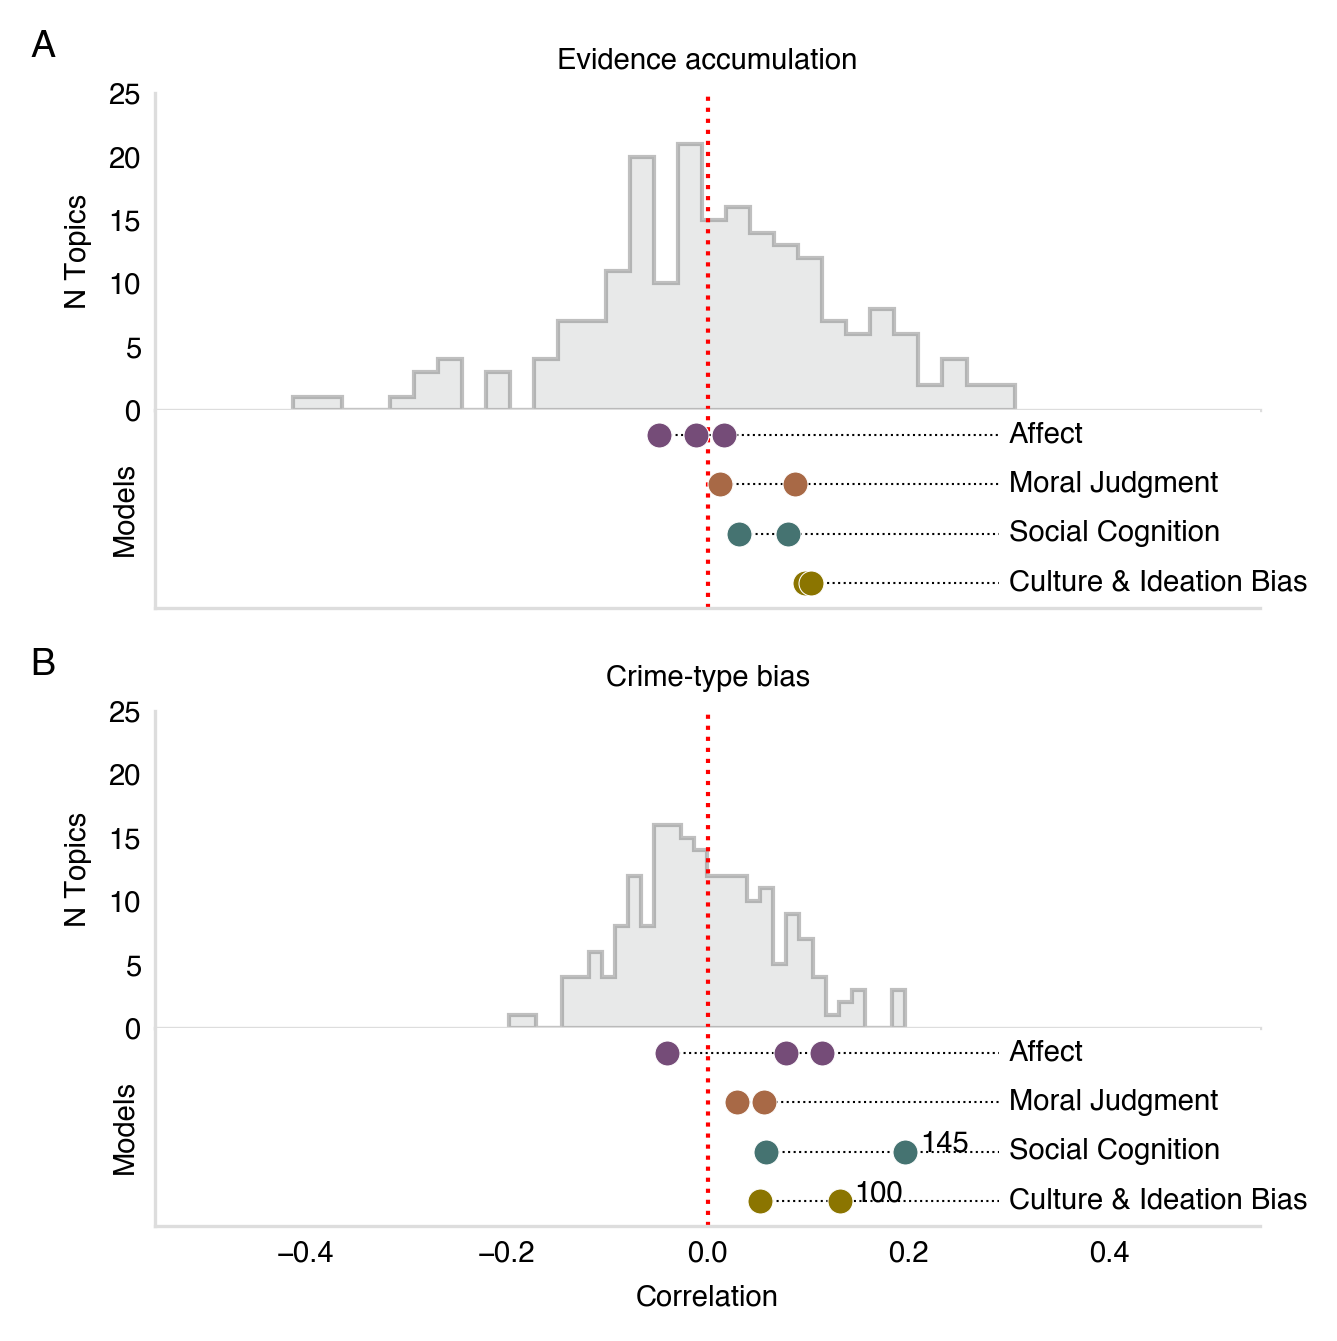

<ipython-input-12-344765e7af44>:264: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('plots/topic_histograms/topic_histogram_panels_tmp.eps', dpi=300, facecolor='w', edgecolor='w',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
###########################
####### HISTOGRAM #########
###########################
from matplotlib import gridspec

fig = plt.figure(figsize=(4.75, 5.0),dpi=300)
fig.patch.set_alpha(1)

gs0 = gridspec.GridSpec(2, 1)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2,1.25], subplot_spec=gs0[0], hspace=0)
ax0 = fig.add_subplot(gs00[0])
ax1 = fig.add_subplot(gs00[1])

gs01 = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2,1.25], subplot_spec=gs0[1], hspace=0)
ax2 = fig.add_subplot(gs01[0])
ax3 = fig.add_subplot(gs01[1])

#main
ax0.hist(data['evidence'], 30,
           density=False, alpha=0.5,
           edgecolor='grey', linewidth=1,
           histtype = 'stepfilled', color='#D2D4D4')


#ax0.set_xlabel('Correlation', fontsize=14)
ax0.set_ylabel('N Topics', fontsize=7)
ax0.set_xlim(-.55, .55)
ax0.set_ylim(0, 25)
ax0.set_title('Evidence accumulation', fontsize=7)

#add line at correlation zero
ax0.axvline(linewidth=1, color='r',linestyle='dotted')

#tick label font
ax0.tick_params(axis='both', which='major', labelsize=7, length=0)

#despine
ax0.spines['top'].set_color('none')
ax0.spines['right'].set_color('none')
ax0.spines['left'].set_color('#DDDDDD')
ax0.spines['bottom'].set_color('#DDDDDD')

#fig.tight_layout()

#final adjustment to allow later addition of annotations
#plt.subplots_adjust(right=0.9, bottom=0.3)

ax0.set_xticks([])

###########################
####### MODELS #########
###########################

#models section of plot
#fig, ax = plt.subplots(figsize=(10, 2),dpi=300)
#fig.patch.set_alpha(1)

#colors
col = ['#754C78','#A86946','#457371','#8B7500']
#order = affect, moral judgment, social cognition, cult/id bias

#add line at correlation zero
ax1.axvline(linewidth=1, color='r',linestyle='dotted')

#height constant
ax1.plot(affect['evidence'],[12,12,12], marker='o', markersize=6,markeredgecolor='white',markerfacecolor=col[0], markeredgewidth=0.25, linestyle='None')
ax1.plot(moral_judgement['evidence'],[10,10], marker='o', markersize=6, markeredgecolor='white',markerfacecolor=col[1], markeredgewidth=0.25, linestyle='None')
ax1.plot(social_cognition['evidence'],[8,8], marker='o', markersize=6, markeredgecolor='white',markerfacecolor=col[2], markeredgewidth=0.25, linestyle='None')
ax1.plot(cult_id_bias['evidence'],[6,6],marker='o', markersize=6,markeredgecolor='white',markerfacecolor=col[3],markeredgewidth=0.25, linestyle='None')

ax1.annotate("Affect",xy=(0.30,12),fontsize=7,va='center')
ax1.annotate("Moral Judgment",xy=(0.30,10),fontsize=7,va='center')
ax1.annotate("Social Cognition",xy=(0.30,8),fontsize=7,va='center')
ax1.annotate("Culture & Ideation Bias",xy=(0.30,6),fontsize=7,va='center')


ax1.hlines([12],xmin=min(affect['evidence']), xmax=0.29, colors='k', linestyles='dotted', lw=0.5)
ax1.hlines([10],xmin=min(moral_judgement['evidence']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)
ax1.hlines([8],xmin=min(social_cognition['evidence']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)
ax1.hlines([6],xmin=min(cult_id_bias['evidence']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)


#affect
for index, row in affect.iterrows():
    if row.evidence_rank < 11:
        ax1.annotate(s=row.topic_num,
             xy=(row.evidence+.015,12),fontsize=7)

#moral judgment
for index, row in moral_judgement.iterrows():
    if row.evidence_rank < 11:
        ax1.annotate(s=row.topic_num,
             xy=(row.evidence+.015,10),fontsize=7)
        
#social cog
for index, row in social_cognition.iterrows():
    if row.evidence_rank < 11:
        ax1.annotate(s=row.topic_num,
             xy=(row.evidence+.015,8),fontsize=7)

#cult/id bias
for index, row in cult_id_bias.iterrows():
    if row.evidence_rank < 11:
        ax1.annotate(s=row.topic_num,
             xy=(row.evidence+.015,6),fontsize=7)




ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')

#tick label font
ax1.tick_params(axis='both', which='major', labelsize=7)


ax1.set_yticks([])
#ax1.set_xlabel('Correlation', fontsize=7)
ax1.set_ylabel('Models', fontsize=7)
ax1.set_xlim(-.55, .55)
ax1.set_ylim(5, 13)

ax1.set_xticks([])

#panel titles
ax0.text(-0.65, 30, 'A',
           fontsize=9, fontweight='bold', va='top', ha='right')

#spacing between panels
#plt.subplots_adjust(hspace=0.0)

#plt.show()

######################


###########################
####### HISTOGRAM #########
###########################
#main
ax2.hist(data['scenario'], 30,
           density=False, alpha=0.5,
           edgecolor='grey', linewidth=1,
           histtype = 'stepfilled', color='#D2D4D4')


#ax0.set_xlabel('Correlation', fontsize=14)
ax2.set_ylabel('N Topics', fontsize=7)
ax2.set_xlim(-.55, .55)
ax2.set_ylim(0, 25)
ax2.set_title('Crime-type bias', fontsize=7)

#add line at correlation zero
ax2.axvline(linewidth=1, color='r',linestyle='dotted')

#tick label font
ax2.tick_params(axis='both', which='major', labelsize=7, length=0)

#despine
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_color('#DDDDDD')

#fig.tight_layout()

#final adjustment to allow later addition of annotations
#plt.subplots_adjust(right=0.9, bottom=0.3)

ax2.set_xticks([])


###########################
####### MODELS #########
###########################

#models section of plot
#fig, ax = plt.subplots(figsize=(10, 2),dpi=300)
#fig.patch.set_alpha(1)

#colors
col = ['#754C78','#A86946','#457371','#8B7500']
#order = affect, moral judgment, social cognition, cult/id bias


#add line at correlation zero
ax3.axvline(linewidth=1, color='r',linestyle='dotted')

#height constant points
ax3.plot(affect['scenario'],[12,12,12], marker='o', markersize=6,markeredgecolor='white',markerfacecolor=col[0], markeredgewidth=0.25, linestyle='None')
ax3.plot(moral_judgement['scenario'],[10,10], marker='o', markersize=6, markeredgecolor='white',markerfacecolor=col[1], markeredgewidth=0.25, linestyle='None')
ax3.plot(social_cognition['scenario'],[8,8], marker='o', markersize=6, markeredgecolor='white',markerfacecolor=col[2], markeredgewidth=0.25, linestyle='None')
ax3.plot(cult_id_bias['scenario'],[6,6],marker='o', markersize=6,markeredgecolor='white',markerfacecolor=col[3],markeredgewidth=0.25, linestyle='None')

#model names
ax3.annotate("Affect",xy=(0.30,12),fontsize=7,va='center')
ax3.annotate("Moral Judgment",xy=(0.30,10),fontsize=7,va='center')
ax3.annotate("Social Cognition",xy=(0.30,8),fontsize=7,va='center')
ax3.annotate("Culture & Ideation Bias",xy=(0.30,6),fontsize=7,va='center')


#line for each row/model
ax3.hlines([12],xmin=min(affect['scenario']), xmax=0.29, colors='k', linestyles='dotted', lw=0.5)
ax3.hlines([10],xmin=min(moral_judgement['scenario']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)
ax3.hlines([8],xmin=min(social_cognition['scenario']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)
ax3.hlines([6],xmin=min(cult_id_bias['scenario']), xmax=0.29, colors='k', linestyles='dotted',lw=0.5)

#affect
for index, row in affect.iterrows():
    if row.scenario_rank < 11:
        ax3.annotate(s=row.topic_num,
             xy=(row.scenario+.015,12),fontsize=7)

#moral judgment
for index, row in moral_judgement.iterrows():
    if row.scenario_rank < 11:
        ax3.annotate(s=row.topic_num,
             xy=(row.scenario+.015,10),fontsize=7)
        
#social cog
for index, row in social_cognition.iterrows():
    if row.scenario_rank < 11:
        ax3.annotate(s=row.topic_num,
             xy=(row.scenario+.015,8),fontsize=7)

#cult/id bias
for index, row in cult_id_bias.iterrows():
    if row.scenario_rank < 11:
        ax3.annotate(s=row.topic_num,
             xy=(row.scenario+.015,6),fontsize=7)


#plot
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color('#DDDDDD')
ax3.spines['bottom'].set_color('#DDDDDD')

#tick label font
ax3.tick_params(axis='both', which='major', labelsize=7, length=0)


#plt.xticks([])
ax3.set_yticks([])
ax3.set_xlabel('Correlation', fontsize=7)
ax3.set_ylabel('Models', fontsize=7)
ax3.set_xlim(-.55, .55)
ax3.set_ylim(5, 13)


#panel titles
ax2.text(-0.65, 30, 'B',
           fontsize=9, fontweight='bold', va='top', ha='right')

#spacing between panels
#plt.subplots_adjust(hspace=0.1)

plt.show()

######################
fig.savefig('plots/topic_histograms/topic_histogram_panels_tmp.eps', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

## Histogram - Term Maps

### Load data

In [55]:
#open data
data = pd.read_csv('decoding_output/decoding_results_terms_unthresholded.csv', error_bad_lines=False);

#rename columns for simplicity
data = data.rename(columns={"juror_z-stat_maps/juror_scenario.nii.gz": "scenario", "juror_z-stat_maps/juror_evidence.nii.gz": "evidence",
                            "juror_z-stat_maps/juror_case_strength.nii.gz": "case_strength", "juror_z-stat_maps/juror_punishment.nii.gz": "punishment"})
#rank
data['scenario_rank'] = data['scenario'].rank(method='first', ascending=False)
data['evidence_rank'] = data['evidence'].rank(method='first', ascending=False)


## Panel Term Histograms

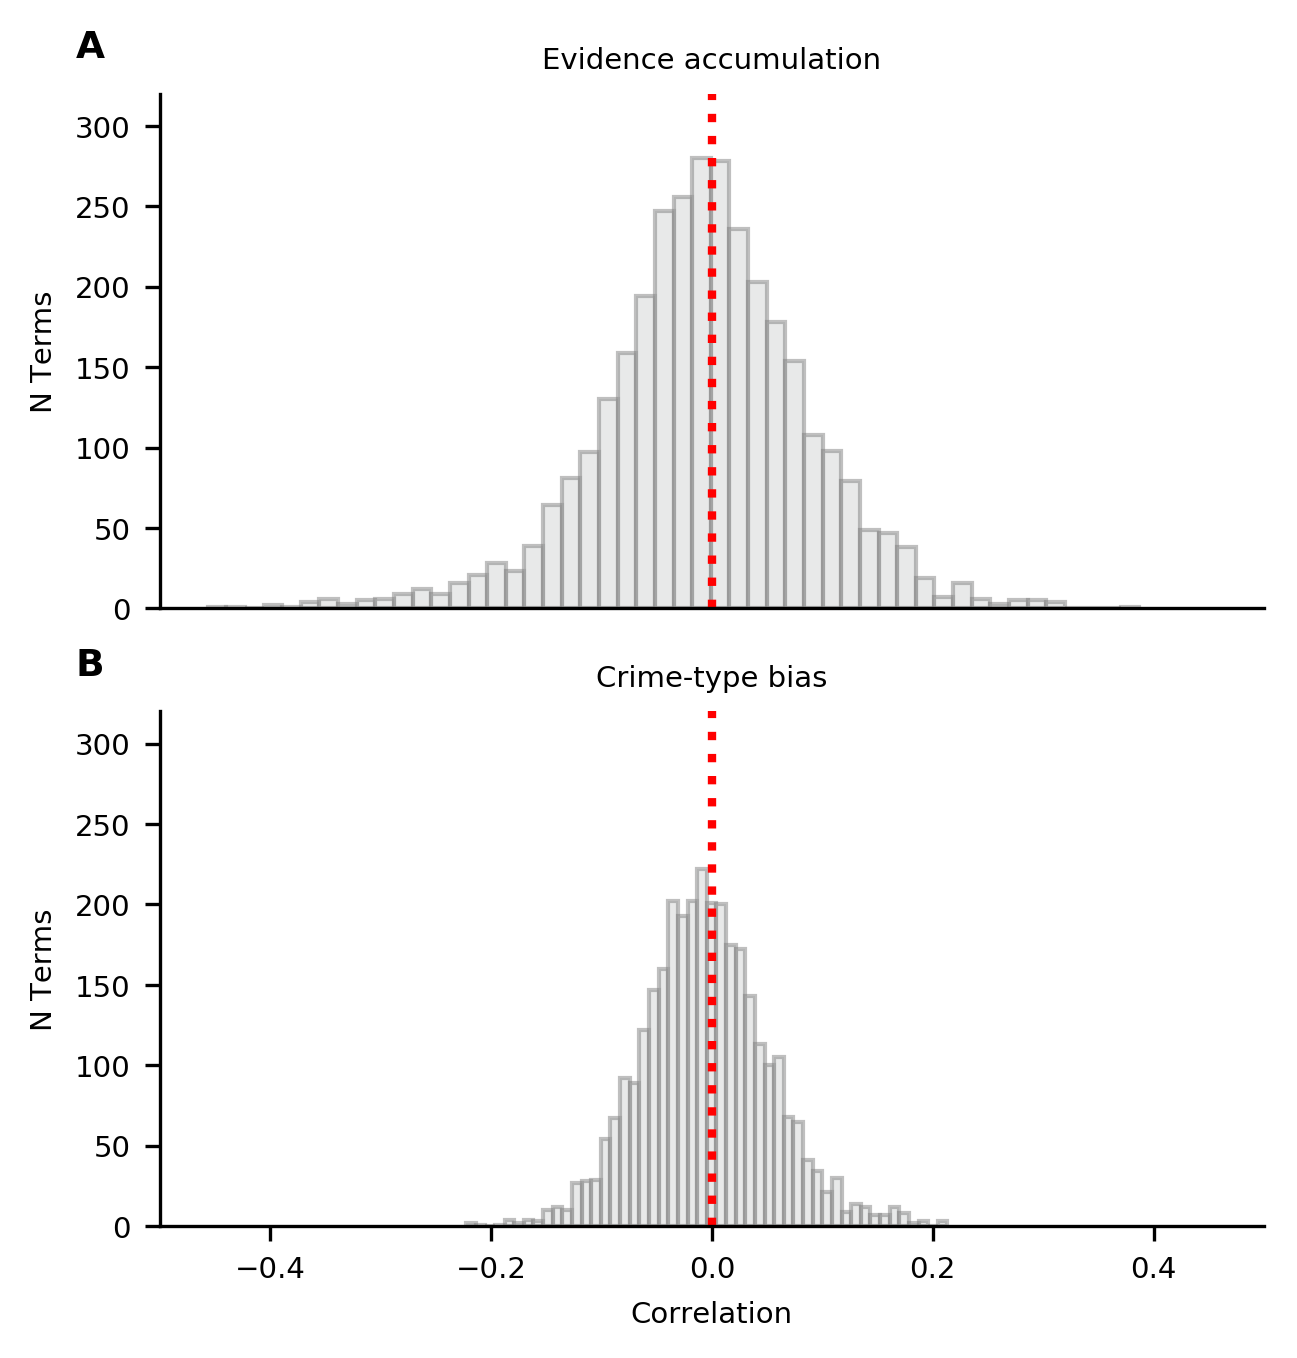

In [56]:
fig = plt.figure(figsize=(4.75, 5),dpi=300)
fig.patch.set_alpha(1)

gs0 = gridspec.GridSpec(1, 1)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[1,1], subplot_spec=gs0[0], hspace=0.2)
ax0 = fig.add_subplot(gs00[0])
ax1 = fig.add_subplot(gs00[1])


#panel 1 - evidence accumulation
ax0.hist(data['evidence'], 50, density=False, facecolor='#D2D4D4',
                           edgecolor='grey', linewidth=1, alpha=0.5)

ax0.set_xlabel('', fontsize=7)
ax0.set_ylabel('N Terms', fontsize=7)
ax0.set_xlim(-.5, .5)
ax0.set_ylim(0, 320)
ax0.set_title('Evidence accumulation', fontsize=7)


#add line at correlation zero
ax0.axvline(linewidth=2, color='r',linestyle='dotted')


#tick label font
ax0.tick_params(axis='both', which='major', labelsize=7)

#despine
ax0.spines['top'].set_color('none')
ax0.spines['right'].set_color('none')


#hide x-axis ticks on the top panel
ax0.set_xticks([])


#panel titles
ax0.text(-0.55, 360, 'A',
           fontsize=9, fontweight='bold', va='top', ha='right')


#panel 2 - crime type bias
ax1.hist(data['scenario'], 50, density=False, facecolor='#D2D4D4',
                           edgecolor='grey', linewidth=1, alpha=0.5)

ax1.set_xlabel('Correlation', fontsize=7)
ax1.set_ylabel('N Terms', fontsize=7)
ax1.set_xlim(-.5, .5)
ax1.set_ylim(0, 320)
ax1.set_title('Crime-type bias', fontsize=7)


#add line at correlation zero
ax1.axvline(linewidth=2, color='r',linestyle='dotted')


#tick label font
ax1.tick_params(axis='both', which='major', labelsize=7)

#despine
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')


#panel titles
ax1.text(-0.55, 360, 'B',fontsize=9, fontweight='bold', va='top', ha='right')

plt.show()

######################
fig.savefig('plots/term_histograms/term_histogram_panels_tmp.eps', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)